In [2]:
import os
import sys
sys.path.append("../..")

from typing import Tuple
import pandas as pd

from utils.io import load_yaml

server = "local"
server = load_yaml("../../config/servers.yml")[server]

database = server["database"]["location"]

def pickle_path(name: str) -> Tuple[str]:
    prefix = ""
    motion_pickle = ""
    if name == "cholec80":
        prefix = "cholec80_single_video_frames_cropped"
        motion_pickle = "23_03_07_pre_processed_frame_increment_5_frames_between_clips_1_log.pkl"
    if name == "heichole":
        prefix = "heichole_single_frames_cropped"
        motion_pickle = "23_03_07_pre_processed_frame_increment_5_frames_between_clips_1_log.pkl"
    if name == "phantom":
        prefix = "21_11_25_first_test_data_frames"
        motion_pickle = "23_03_07_pre_processed_frame_increment_10_frames_between_clips_1_log.pkl"
    if name == "autolaparo":
        prefix = "autolaparo_single_frames/AutoLaparo_Task2"
        motion_pickle = "23_03_07_pre_processed_frame_increment_5_frames_between_clips_1_log.pkl"

    return prefix, motion_pickle

# cholec80
prefix, motion_pickle = pickle_path("cholec80")
# prefix, motion_pickle = pickle_path("heichole")
# prefix, motion_pickle = pickle_path("phantom")
# prefix, motion_pickle = pickle_path("autolaparo")

df = pd.read_pickle(os.path.join(database, prefix, motion_pickle))
df = df.dropna()
df

Reading file from ../../config/servers.yml


,folder,file,vid,frame,duv,duv_mpd
0,vid_0,frame_0.npy,0.0,0.0,"[[-10.359389305114746, 15.153190612792969], [-...",16.581640
1,vid_0,frame_1.npy,0.0,1.0,"[[-5.366467475891113, 15.454025268554688], [-4...",15.282018
2,vid_0,frame_2.npy,0.0,2.0,"[[-6.212911605834961, 15.740330696105957], [-0...",14.922884
3,vid_0,frame_3.npy,0.0,3.0,"[[-6.227919101715088, 15.311184883117676], [-1...",14.742453
4,vid_0,frame_4.npy,0.0,4.0,"[[-4.537388801574707, 13.769291877746582], [-9...",16.812211
...,...,...,...,...,...,...
4423890,vid_78,frame_85290.npy,78.0,85290.0,"[[10.215372085571289, 14.203713417053223], [24...",19.675780
4423891,vid_78,frame_85291.npy,78.0,85291.0,"[[3.8433585166931152, 14.12555980682373], [30....",20.559911
4423892,vid_78,frame_85292.npy,78.0,85292.0,"[[3.9745259284973145, 12.260805130004883], [29...",18.969518
4423893,vid_78,frame_85293.npy,78.0,85293.0,"[[5.08298397064209, 7.991215705871582], [27.49...",17.148272


In [3]:
df_vid_0 = df[df["vid"] == 0]
df_vid_0

,folder,file,vid,frame,duv,duv_mpd
0,vid_0,frame_0.npy,0.0,0.0,"[[-10.359389305114746, 15.153190612792969], [-...",16.581640
1,vid_0,frame_1.npy,0.0,1.0,"[[-5.366467475891113, 15.454025268554688], [-4...",15.282018
2,vid_0,frame_2.npy,0.0,2.0,"[[-6.212911605834961, 15.740330696105957], [-0...",14.922884
3,vid_0,frame_3.npy,0.0,3.0,"[[-6.227919101715088, 15.311184883117676], [-1...",14.742453
4,vid_0,frame_4.npy,0.0,4.0,"[[-4.537388801574707, 13.769291877746582], [-9...",16.812211
...,...,...,...,...,...,...
43290,vid_0,frame_43290.npy,0.0,43290.0,"[[-2.894594669342041, -29.603639602661133], [1...",31.737872
43291,vid_0,frame_43291.npy,0.0,43291.0,"[[-8.12636661529541, 4.178806304931641], [26.4...",24.979138
43292,vid_0,frame_43292.npy,0.0,43292.0,"[[4.903045654296875, 15.096610069274902], [22....",22.365183
43293,vid_0,frame_43293.npy,0.0,43293.0,"[[15.590643882751465, 17.26415252685547], [20....",25.077081


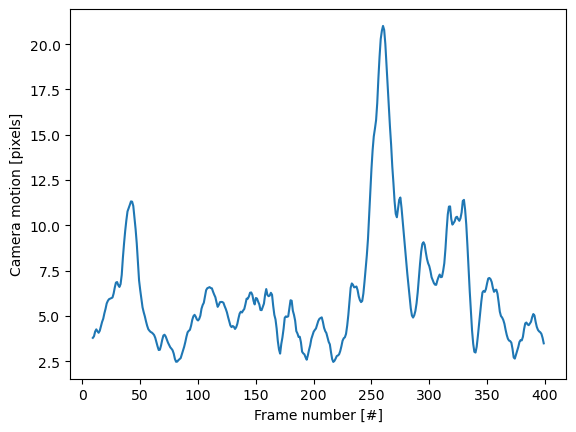

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N0 = 9800
N1 = 10200
window = 10

# running average
plt.plot(np.arange(N1- N0), df_vid_0["duv_mpd"][N0:N1].rolling(window).mean())
plt.xlabel("Frame number [#]")
plt.ylabel("Camera motion [pixels]")
plt.show()